<h2><center> Image Classification of Birds using the iNaturalist Dataset</center></h2>
<h3><center>Springboard | Capstone 2: In-Depth Analysis/CNN: Model 2 </center></h3>
<h4><center>By: Lauren Broussard</center></h4>

----

In [1]:
from keras.models import Sequential,load_model #used to build model 
from keras.layers import Activation, Dense, Dropout, Flatten #Dense used to add layers to model
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix

Let's run another model using Convolutional Neural Networks (CNN).

Again, we'll run some of our setup operations from our PreProcessing Notebook. In it, we'll do a number of set up steps like create our train, test, and validation sets, set up the number of epochs to run, and augment the orientation of our training and validation images. 

We'll also decide how many images to use of our total dataset. 

In [2]:
print("Pre-Processing & Set Up")
%run ./2.0_PreProcessing_SetUp.ipynb

Pre-Processing & Set Up
Total Images To Use: 15000

Number of Training Images:  8400
Number of Validation Images:  3000
Number of Test Images:  3600 

Enter Total Epochs: 50
img_dir =  ../data/raw/
img_width, img_height =  128 128
batch_size =  128
no_epochs =  50
no_classes =  2
patience =  10 


Augment Images - Training
Found 8400 validated image filenames belonging to 2 classes.
CPU times: user 73.4 ms, sys: 37.6 ms, total: 111 ms
Wall time: 193 ms

Augment Images - Validation and Testing
Found 3000 validated image filenames belonging to 2 classes.
CPU times: user 31.2 ms, sys: 20 ms, total: 51.2 ms
Wall time: 89.5 ms


----

### MODEL 2.

We'll set up our architecture. We'll add four convolutional layers, four max pooling layers (which will summarize groups of pixels and help decrease the number of parameters), and a dense layer. As in our first model, we'll be using ReLu activation through the layers, and Sigmoid activation in the final layer. 

#### Add Layers

In [3]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=(img_width,img_height,3))) #convolution layer
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) #

model2.add(Conv2D(32, (3, 3))) #receives input from previous conv layer
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dropout(0.6)) # what proportion to drop out
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

#### Compile

In [4]:
%%time
# compile, and add metrics==['accuracy'] to keep track of diagnostics for each epoch
model2.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

CPU times: user 7.92 ms, sys: 1.34 ms, total: 9.25 ms
Wall time: 7.97 ms


#### Fit

In [5]:
%%time
model2_history = model2.fit(
    train_generator,
    steps_per_epoch= len(df_train) // batch_size,
    epochs=no_epochs,
    validation_data=valid_generator,
    validation_steps= len(df_val) // batch_size,
    callbacks = [early_stopping_monitor],
    verbose=2)

Epoch 1/50
65/65 - 152s - loss: 0.5851 - accuracy: 0.6904 - val_loss: 0.5865 - val_accuracy: 0.6933
Epoch 2/50
65/65 - 150s - loss: 0.5197 - accuracy: 0.7479 - val_loss: 0.5872 - val_accuracy: 0.6793
Epoch 3/50
65/65 - 144s - loss: 0.4941 - accuracy: 0.7660 - val_loss: 0.5331 - val_accuracy: 0.7289
Epoch 4/50
65/65 - 146s - loss: 0.4548 - accuracy: 0.7934 - val_loss: 0.5546 - val_accuracy: 0.7317
Epoch 5/50
65/65 - 150s - loss: 0.4429 - accuracy: 0.7968 - val_loss: 0.5228 - val_accuracy: 0.7595
Epoch 6/50
65/65 - 160s - loss: 0.4446 - accuracy: 0.7947 - val_loss: 0.4795 - val_accuracy: 0.7497
Epoch 7/50
65/65 - 158s - loss: 0.4352 - accuracy: 0.8034 - val_loss: 0.4332 - val_accuracy: 0.7999
Epoch 8/50
65/65 - 155s - loss: 0.4175 - accuracy: 0.8088 - val_loss: 0.4796 - val_accuracy: 0.7765
Epoch 9/50
65/65 - 166s - loss: 0.4211 - accuracy: 0.8059 - val_loss: 0.4726 - val_accuracy: 0.7643
Epoch 10/50
65/65 - 179s - loss: 0.4035 - accuracy: 0.8177 - val_loss: 0.4005 - val_accuracy: 0.8122

#### Training & Validation Summary

In [6]:
# show summary 
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9

Let's take a look at how our training and validation sessions went. 

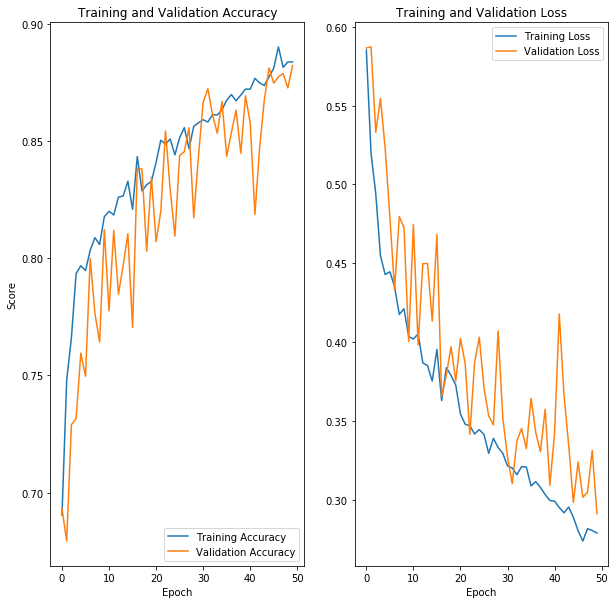

In [7]:
# plot 
plot_accuracy_and_loss(model2_history) #from preprocessing and setup notebook

In [8]:
# save model
file_name = 'model2.h5'
model2.save('../models/{}'.format(file_name))

#### Predict

Finally, we'll make predictions on our test set. 

In [9]:
# load pre-trained model 

model2 = load_model('../models/model2.h5')

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
                    dataframe=df_test,
                    directory=img_dir,
                    x_col="file_name",
                    y_col="is_bird",
                    batch_size=1,
                    shuffle=False,
                    class_mode="binary",    
                    target_size=(img_height,img_width))

Found 3600 validated image filenames belonging to 2 classes.


In [11]:
%%time
test_generator.reset()

# make predictions on model2

# get prediction probabilities 
y_pred_prob = model2.predict(test_generator)

# get binary results - 1 if bird predicted, 0 if not
y_pred_binary = (y_pred_prob > 0.5).astype('int32')

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred_binary))
print('Classification Report')
target_names = ['Not Bird', 'Bird']
print(classification_report(test_generator.classes, y_pred_binary, target_names=target_names))

Confusion Matrix
[[1618  212]
 [ 244 1526]]
Classification Report
              precision    recall  f1-score   support

    Not Bird       0.87      0.88      0.88      1830
        Bird       0.88      0.86      0.87      1770

    accuracy                           0.87      3600
   macro avg       0.87      0.87      0.87      3600
weighted avg       0.87      0.87      0.87      3600

CPU times: user 54.6 s, sys: 3.27 s, total: 57.9 s
Wall time: 34 s


### RESULTS & VISUALIZATIONS

Looking at our ROC curve, we can see that the model is predicting quite well. 

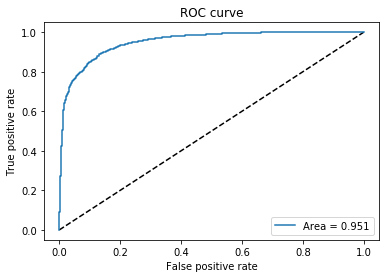

In [12]:
plot_auc_roc(test_generator.classes,y_pred_prob) #called from 2.0_PreProcessing Notebook

Finally, we'll create a DataFrame of our predictions and probabilities so we can look at images that the model was able to predict correctly, as well as some images the model got wrong.

In [13]:
# create dataframe of predictions vs actual values
df = pd.DataFrame({'actual': test_generator.classes,'prediction': y_pred_binary[:,0],'y_pred_prob': y_pred_prob[:,0], 'file_name': test_generator.filenames})

# create column distinguishing whether or not the classification was correct
df['correct'] = np.where(df.actual == df.prediction,1,0) 

In [14]:
df.tail()

,actual,prediction,y_pred_prob,file_name,correct
3595,1,1,0.910589,train_val2019/Birds/279/b9b76c62a81e43a2720322...,1
3596,0,0,0.250253,train_val2019/Plants/914/cca0aedb922b20fa53531...,1
3597,0,0,0.489608,train_val2019/Reptiles/181/596713030d57f5861c1...,1
3598,1,0,0.464410,train_val2019/Birds/294/aa106d6549d67b5dae9a2f...,0
3599,1,1,0.990674,train_val2019/Birds/277/d49c1d2e7638d66ae1ab04...,1


**Correct Classifications**

train_val2019/Birds/288/51162469c77943be14d723a741ad12e8.jpg
train_val2019/Plants/733/629e6f9f42f03e7c0fdbe1db30741a65.jpg
train_val2019/Birds/213/430078198735fc83825e4933daba3f5a.jpg
train_val2019/Plants/789/2f61bf49fa293ec8fa0f041fcdae7c26.jpg
train_val2019/Plants/393/19032915644f28fc9df82f0d5e379a52.jpg
train_val2019/Plants/425/e105ec8e0e95877e1f28f294890c70b2.jpg
train_val2019/Reptiles/166/5a7b7a137e11e4994e2c4c71dee7eed4.jpg
train_val2019/Birds/233/d9ee47955d4e0969eeef8366acf8cd72.jpg
train_val2019/Plants/336/688d6a9e3e45d3f500f20b950eaaa3c6.jpg
train_val2019/Birds/313/4322ded5ec8b88901a196a2f953b4461.jpg


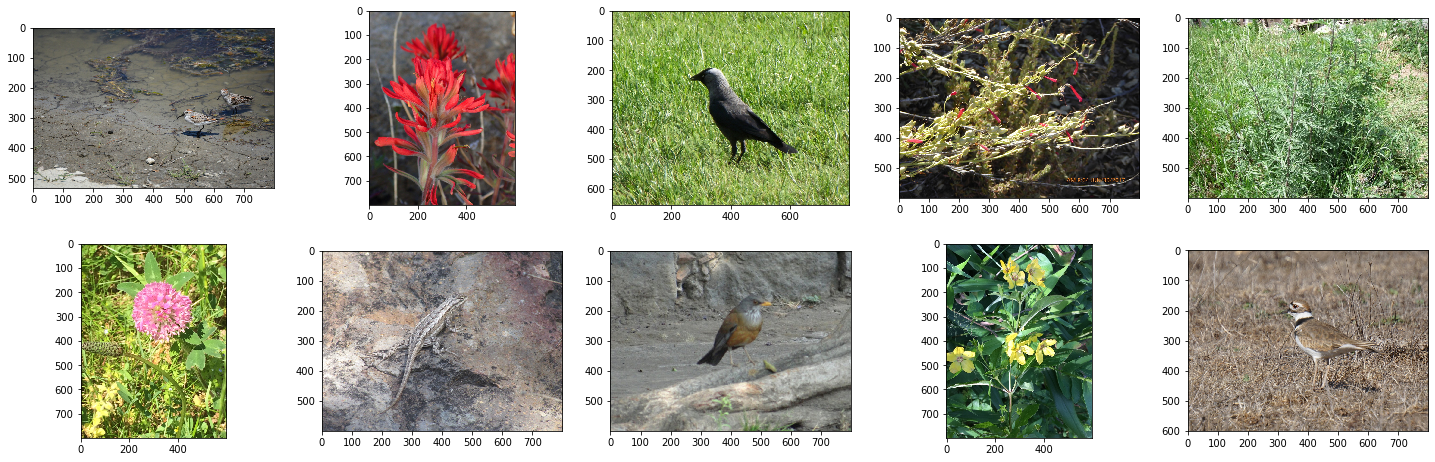

In [15]:
import cv2

# view correct bird classification 
img_names = df[(df['correct'] == 1)]['file_name'][1020:1030]
plt.figure(figsize=[25,25])
i = 1
for img_name in img_names:
    print(img_name)
    img = cv2.imread("../data/raw/%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

In [16]:
# get probability for each image 
df[(df['correct'] == 1)][1020:1030]

,actual,prediction,y_pred_prob,file_name,correct
1174,1,1,0.947993,train_val2019/Birds/288/51162469c77943be14d723...,1
1175,0,0,0.111596,train_val2019/Plants/733/629e6f9f42f03e7c0fdbe...,1
1176,1,1,0.999685,train_val2019/Birds/213/430078198735fc83825e49...,1
1178,0,0,0.023685,train_val2019/Plants/789/2f61bf49fa293ec8fa0f0...,1
1179,0,0,0.030048,train_val2019/Plants/393/19032915644f28fc9df82...,1
1180,0,0,0.000003,train_val2019/Plants/425/e105ec8e0e95877e1f28f...,1
1181,0,0,0.288027,train_val2019/Reptiles/166/5a7b7a137e11e4994e2...,1
1182,1,1,0.994418,train_val2019/Birds/233/d9ee47955d4e0969eeef83...,1
1183,0,0,0.017577,train_val2019/Plants/336/688d6a9e3e45d3f500f20...,1
1184,1,1,0.820168,train_val2019/Birds/313/4322ded5ec8b88901a196a...,1


**Incorrect Classification: High Confidence, Not Bird**

train_val2019/Plants/837/980b6c96f34f775508ca9cf490396e2f.jpg
train_val2019/Amphibians/154/40e5a290f5d2a1a4a39182785ec3af9e.jpg
train_val2019/Plants/402/f7b3a1ba8525594e0f56066f9213febe.jpg
train_val2019/Plants/965/9317ea9463852922d82e3def97c32f72.jpg
train_val2019/Plants/417/f452a6edb7e766e3bb43ff49a19a9b78.jpg
train_val2019/Plants/664/cc2e570538391ad0351dd5bca9eca342.jpg
train_val2019/Plants/702/820846f4cedbcfaaabb80509153be0be.jpg
train_val2019/Reptiles/187/47e711a44b8701323bba4ba5e5973885.jpg
train_val2019/Plants/690/9675c572fb5f050cbcae1aaccd72c591.jpg
train_val2019/Insects/107/0e3dd88c0d121103abb5bb03be6648f7.jpg


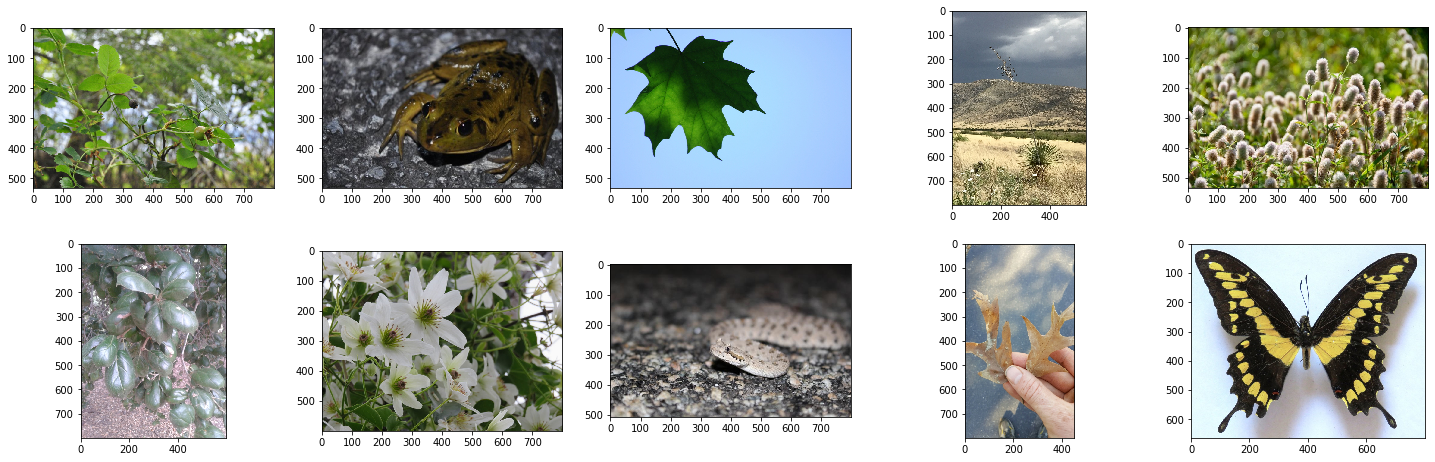

In [17]:
# view incorrect bird classification: high confidence and not bird
img_names = df.loc[(df['correct'] == 0) & (df['y_pred_prob'] > .8) & (df['actual'] ==0)]['file_name'][10:20]
plt.figure(figsize=[25,25])
i = 1
for img_name in img_names:
    print(img_name)
    img = cv2.imread("../data/raw/%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

In [18]:
# get probability for each image 
df.loc[(df['correct'] == 0) & (df['y_pred_prob'] > .8) & (df['actual'] ==0)][10:20]

,actual,prediction,y_pred_prob,file_name,correct
635,0,1,0.852242,train_val2019/Plants/837/980b6c96f34f775508ca9...,0
744,0,1,0.940153,train_val2019/Amphibians/154/40e5a290f5d2a1a4a...,0
768,0,1,0.997390,train_val2019/Plants/402/f7b3a1ba8525594e0f560...,0
807,0,1,0.831649,train_val2019/Plants/965/9317ea9463852922d82e3...,0
999,0,1,0.914025,train_val2019/Plants/417/f452a6edb7e766e3bb43f...,0
1036,0,1,0.815100,train_val2019/Plants/664/cc2e570538391ad0351dd...,0
1079,0,1,0.814305,train_val2019/Plants/702/820846f4cedbcfaaabb80...,0
1102,0,1,0.942668,train_val2019/Reptiles/187/47e711a44b8701323bb...,0
1107,0,1,0.800335,train_val2019/Plants/690/9675c572fb5f050cbcae1...,0
1159,0,1,0.990383,train_val2019/Insects/107/0e3dd88c0d121103abb5...,0


**Incorrect Classification: Low Confidence, Is Bird**

train_val2019/Birds/321/462c8e9548b8e6e0250482937918a8a5.jpg
train_val2019/Birds/226/512da68941856b06ae303abe43927fae.jpg
train_val2019/Birds/203/714aca257afa8e11dafd9acc3c9cff2f.jpg
train_val2019/Birds/254/fcfaf5eddb120a34c8d5e35d3aa2b05a.jpg
train_val2019/Birds/279/83c028d5ed6bad29db4e32c3aff511d6.jpg
train_val2019/Birds/246/183cadca5aa8300ead2a03a984ebacb5.jpg
train_val2019/Birds/282/89ca5b64e4294b0064221349f735bbe6.jpg
train_val2019/Birds/212/533afffc13520f6f51a707dc6421f550.jpg
train_val2019/Birds/205/9c2ce0be157be1877685cf9e5299b1a4.jpg
train_val2019/Birds/202/6b8c1ca8a40afd3288821992e081374c.jpg


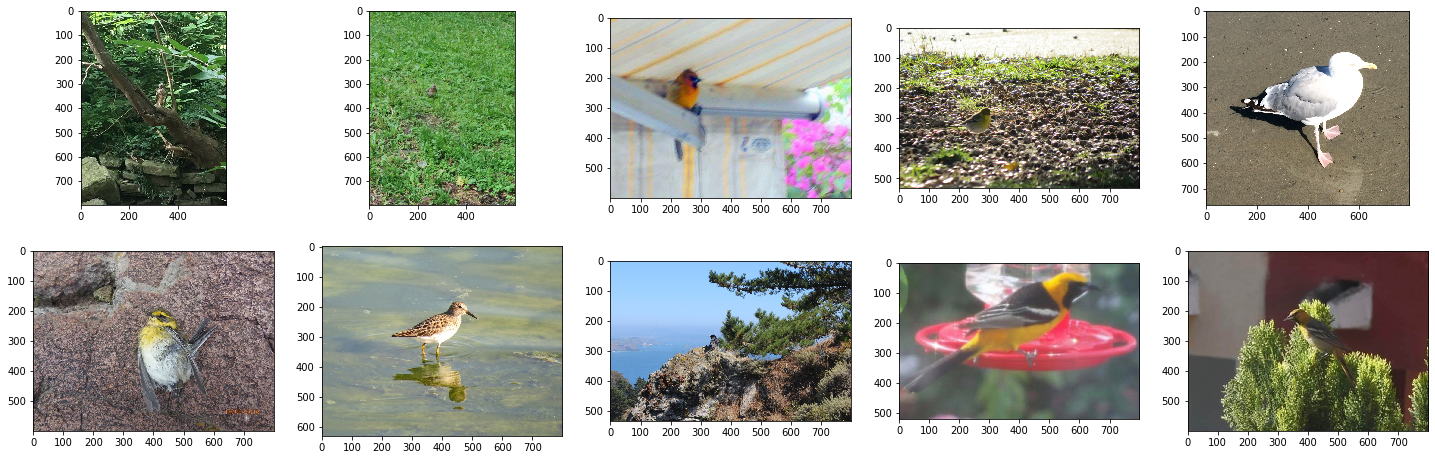

In [19]:
# view incorrect bird classification: low confidence and bird
img_names = df.loc[(df['correct'] == 0) & (df['y_pred_prob'] < .2) & (df['actual'] ==1)]['file_name'][10:20]
plt.figure(figsize=[25,25])
i = 1
for img_name in img_names:
    print(img_name)
    img = cv2.imread("../data/raw/%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

In [20]:
# get probability for each image 
df.loc[(df['correct'] == 0) & (df['y_pred_prob'] < .2) & (df['actual'] ==1)][10:20]

,actual,prediction,y_pred_prob,file_name,correct
862,1,0,0.193696,train_val2019/Birds/321/462c8e9548b8e6e0250482...,0
943,1,0,0.139003,train_val2019/Birds/226/512da68941856b06ae303a...,0
982,1,0,0.075025,train_val2019/Birds/203/714aca257afa8e11dafd9a...,0
1015,1,0,0.041189,train_val2019/Birds/254/fcfaf5eddb120a34c8d5e3...,0
1037,1,0,0.050778,train_val2019/Birds/279/83c028d5ed6bad29db4e32...,0
1066,1,0,0.188306,train_val2019/Birds/246/183cadca5aa8300ead2a03...,0
1201,1,0,0.135277,train_val2019/Birds/282/89ca5b64e4294b00642213...,0
1243,1,0,0.181311,train_val2019/Birds/212/533afffc13520f6f51a707...,0
1276,1,0,0.151168,train_val2019/Birds/205/9c2ce0be157be1877685cf...,0
1317,1,0,0.098906,train_val2019/Birds/202/6b8c1ca8a40afd32888219...,0


----

In [21]:
%load_ext watermark
%watermark -a "Lab 2.0" -d -t -v -p numpy,pandas,tensorflow,keras

Lab 2.0 2020-10-05 23:21:53 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
pandas 1.0.1
tensorflow 2.3.0
keras 2.4.3
